## ARIMA


Fitting ARIMA model on training data...


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     TL   No. Observations:               434784
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -547241.529
Date:                Mon, 16 Jun 2025   AIC                        1094493.057
Time:                        15:37:16   BIC                        1094547.970
Sample:                    01-01-1961   HQIC                       1094508.694
                         - 08-08-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.017      0.536      0.592      -0.025       0.043
ar.L1          1.7984      0.001   2435.519      0.000       1.797       1.800
ar.L2         -0.8946      0.001  -1263.563      0.0

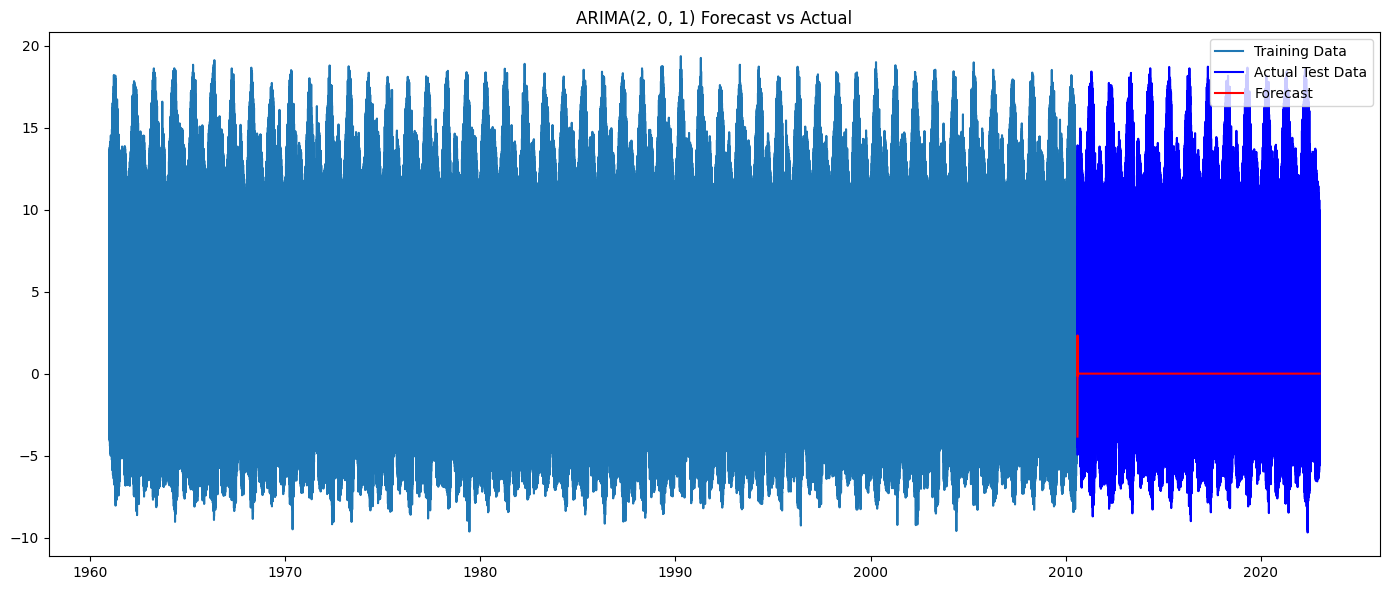

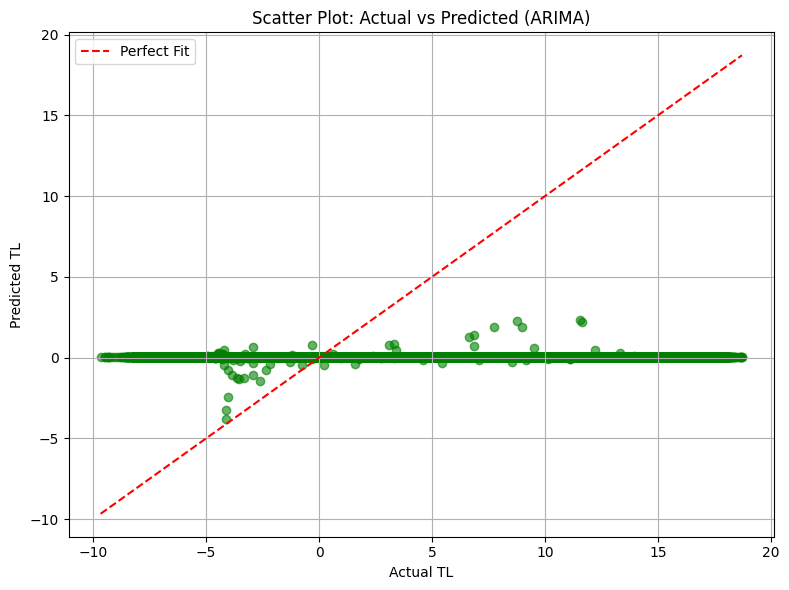

RMSE: 6.2730
R²: 0.0001


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Load CSV
df = pd.read_csv(r'/home/bel/Desktop/Shiv_SRIP/ATenLoc/Data/Output_hourly_h200_alb50/1961-2022_NH-44-Del.csv')

# Create datetime column and set as index
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.set_index('datetime', inplace=True)

# Target variable
tl_series = df['TL']

# Train/test split
train_size = int(len(tl_series) * 0.8)
train_tl, test_tl = tl_series[:train_size], tl_series[train_size:]

# Fit ARIMA model on training data
order = (2, 0, 1)  

print("Fitting ARIMA model on training data...")
model = ARIMA(train_tl, order=order)
results = model.fit()

print(results.summary())

# Forecast for test period
n_test = len(test_tl)
forecast = results.forecast(steps=n_test)
forecast.index = test_tl.index  # Align index for plotting

# Plot time series forecast
plt.figure(figsize=(14, 6))
plt.plot(train_tl.index, train_tl, label='Training Data')
plt.plot(test_tl.index, test_tl, label='Actual Test Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title(f'ARIMA{order} Forecast vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

# ================================
# Scatter plot: Actual vs Predicted
# ================================
plt.figure(figsize=(8, 6))
plt.scatter(test_tl, forecast, alpha=0.6, color='green')
plt.plot([test_tl.min(), test_tl.max()], [test_tl.min(), test_tl.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual TL')
plt.ylabel('Predicted TL')
plt.title('Scatter Plot: Actual vs Predicted (ARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print performance metrics
rmse = np.sqrt(mean_squared_error(test_tl, forecast))
r2 = r2_score(test_tl, forecast)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Fitting ARIMA model on training data...


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   CESR   No. Observations:               434784
Model:                 ARIMA(2, 0, 1)   Log Likelihood             1050918.537
Date:                Mon, 16 Jun 2025   AIC                       -2101827.074
Time:                        15:44:10   BIC                       -2101772.161
Sample:                    01-01-1961   HQIC                      -2101811.438
                         - 08-08-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.000    -12.317      0.000      -0.003      -0.002
ar.L1          1.7939      0.001   2145.085      0.000       1.792       1.796
ar.L2         -0.8946      0.001  -1061.184      0.0

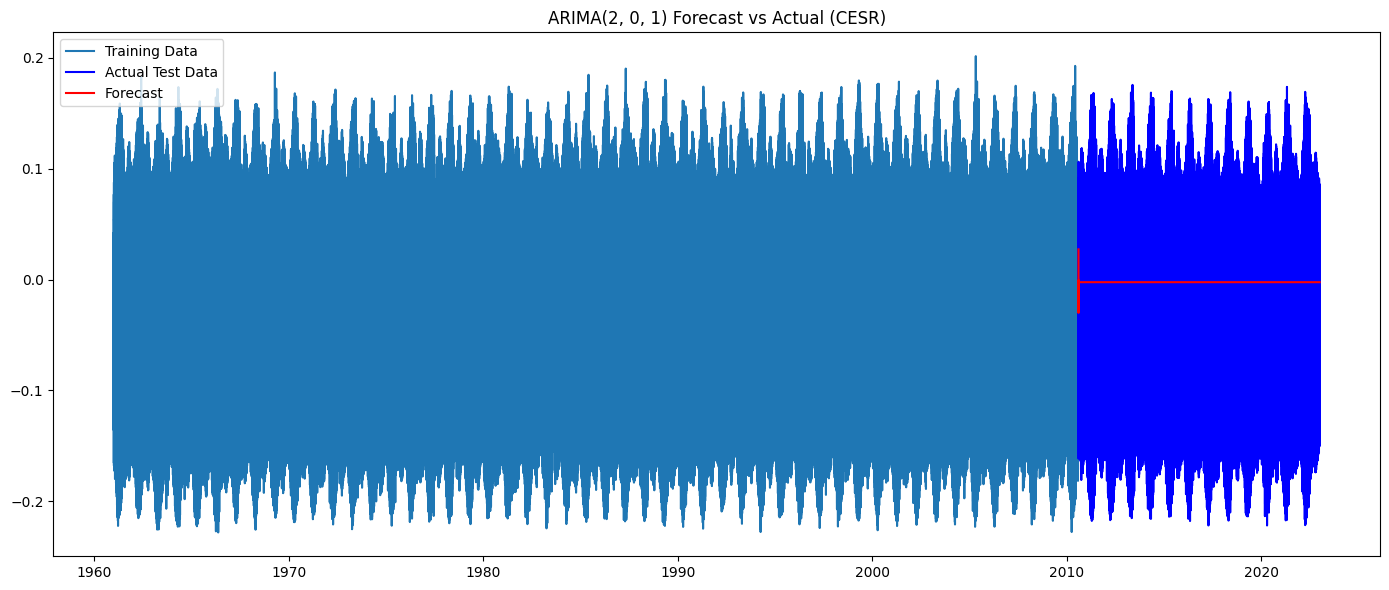

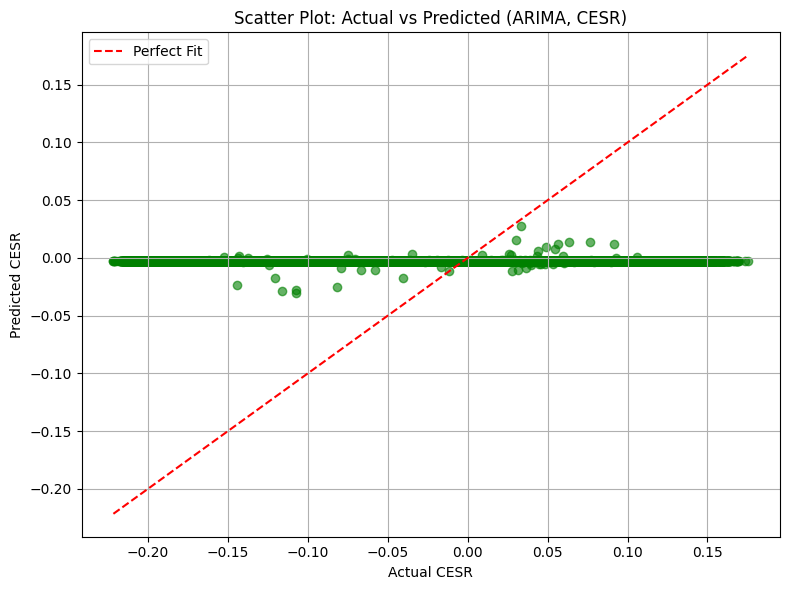

RMSE: 0.0805
R²: 0.0001


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load CSV
df = pd.read_csv(r'/home/bel/Desktop/Shiv_SRIP/ATenLoc/Data/Output_hourly_h200_alb50/1961-2022_NH-44-Del.csv')

# Create datetime column and set as index
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.set_index('datetime', inplace=True)

# Target variable changed to CESR
cesr_series = df['CESR']

# Train/test split
train_size = int(len(cesr_series) * 0.8)
train_cesr, test_cesr = cesr_series[:train_size], cesr_series[train_size:]

# Fit ARIMA model on training data
order = (2, 0, 1)  

print("Fitting ARIMA model on training data...")
model = ARIMA(train_cesr, order=order)
results = model.fit()

print(results.summary())

# Forecast for test period
n_test = len(test_cesr)
forecast = results.forecast(steps=n_test)
forecast.index = test_cesr.index  # Align index for plotting

# Plot time series forecast
plt.figure(figsize=(14, 6))
plt.plot(train_cesr.index, train_cesr, label='Training Data')
plt.plot(test_cesr.index, test_cesr, label='Actual Test Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title(f'ARIMA{order} Forecast vs Actual (CESR)')
plt.legend()
plt.tight_layout()
plt.show()

# ================================
# Scatter plot: Actual vs Predicted
# ================================
plt.figure(figsize=(8, 6))
plt.scatter(test_cesr, forecast, alpha=0.6, color='green')
plt.plot([test_cesr.min(), test_cesr.max()], [test_cesr.min(), test_cesr.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual CESR')
plt.ylabel('Predicted CESR')
plt.title('Scatter Plot: Actual vs Predicted (ARIMA, CESR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Performance metrics
rmse = np.sqrt(mean_squared_error(test_cesr, forecast))
r2 = r2_score(test_cesr, forecast)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


## SARIMA

datetime
1961-01-01 05:00:00   -0.0000
1961-01-01 06:00:00   -0.0000
1961-01-01 07:00:00    0.0030
1961-01-01 08:00:00   -0.0540
1961-01-01 09:00:00    0.4272
Name: TL, dtype: float64
0   -0.0000
1   -0.0000
2    0.0030
3   -0.0540
4    0.4272
Name: TL, dtype: float64
Fitting SARIMA model on full dataset... This may take a while.


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                  TL   No. Observations:               434784
Model:             SARIMAX(2, 0, 1)x(1, 1, [], 24)   Log Likelihood             -449670.555
Date:                             Mon, 16 Jun 2025   AIC                         899351.110
Time:                                     15:51:12   BIC                         899406.022
Sample:                                 01-01-1961   HQIC                        899366.746
                                      - 08-08-2010                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4401      0.003    491.634      0.000       1.434       1.446
ar.L2         -0.5419      

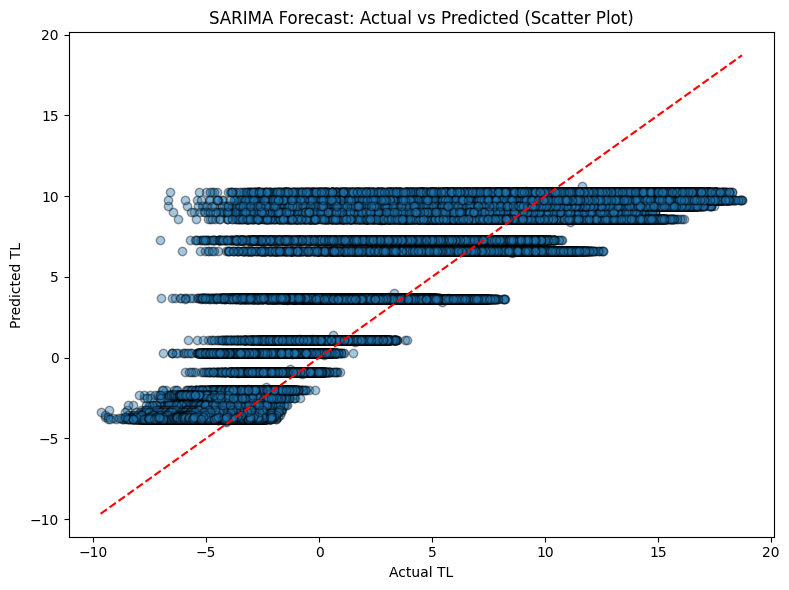

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Load CSV
df = pd.read_csv(r'/home/bel/Desktop/Shiv_SRIP/ATenLoc/Data/Output_hourly_h200_alb50/1961-2022_NH-44-Del.csv')

# Create datetime column
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
tl = df['TL']
# Create TL time series
tl_series = pd.Series(data=df['TL'].values, index=df['datetime'], name='TL')

# Optional: print or inspect
print(tl_series.head())
print(tl.head())


# Use the complete dataset
# Assuming tl_series is a pandas Series with a datetime index
train_size = int(len(tl_series) * 0.8)
train, test = tl_series[:train_size], tl_series[train_size:]

# Fit SARIMA model on full training data
print("Fitting SARIMA model on full dataset... This may take a while.")
model = SARIMAX(
    train,
    order=(2, 0, 1),              
    seasonal_order=(1, 1, 0, 24),   
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False, low_memory=True)

# Print model summary
print(results.summary())

# Forecast for the test period
n_test = len(test)
forecast = results.get_forecast(steps=n_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Evaluation metrics
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
r2 = r2_score(test, forecast_mean)

print("\nEvaluation Metrics:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(test, forecast_mean, alpha=0.4, edgecolor='k')
plt.plot([test.min(), test.max()], [test.min(), test.max()], color='red', linestyle='--')
plt.xlabel('Actual TL')
plt.ylabel('Predicted TL')
plt.title('SARIMA Forecast: Actual vs Predicted (Scatter Plot)')
plt.tight_layout()
plt.show()


Fitting SARIMA model on full dataset... This may take a while.


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                CESR   No. Observations:               434784
Model:             SARIMAX(2, 0, 1)x(1, 1, [], 24)   Log Likelihood              848845.557
Date:                             Mon, 16 Jun 2025   AIC                       -1697681.115
Time:                                     16:04:14   BIC                       -1697626.202
Sample:                                 01-01-1961   HQIC                      -1697665.479
                                      - 08-08-2010                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5215      0.004    139.886      0.000       0.514       0.529
ar.L2          0.1932      

Text(0, 0.5, 'CESR')

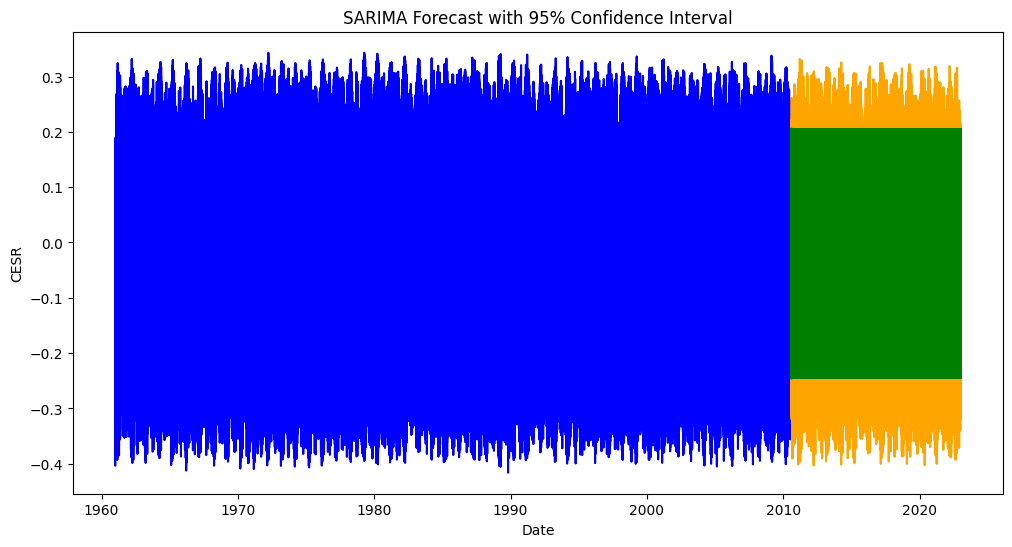

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Load dataset
df = pd.read_csv(r'/home/bel/Desktop/Shiv_SRIP/ATenLoc/Data/Test/Alb30/h300/1961-2022_NH-44-TN.csv')

# Create datetime column
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

# Create CESR time series
cesr_series = pd.Series(data=df['CESR'].values, index=df['datetime'], name='CESR')

# Split into training and testing
train_size = int(len(cesr_series) * 0.8)
train, test = cesr_series[:train_size], cesr_series[train_size:]

# Fit SARIMA model on training data
print("Fitting SARIMA model on full dataset... This may take a while.")
model = SARIMAX(
    train,
    order=(2, 0, 1),               # (p,d,q)
    seasonal_order=(1, 1, 0, 24),  # (P,D,Q,s) - daily seasonality with hourly data
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False, low_memory=True)

# Print model summary
print(results.summary())

# Forecast for the test period
n_test = len(test)
forecast = results.get_forecast(steps=n_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Evaluation metrics
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
r2 = r2_score(test, forecast_mean)

print("\nEvaluation Metrics:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.title('SARIMA Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('CESR')  

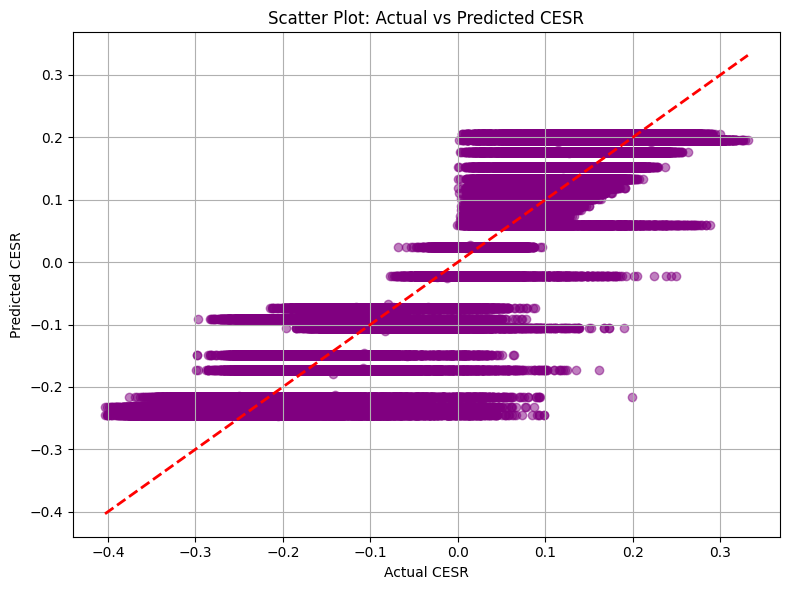

In [5]:
# ✅ Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(test, forecast_mean, alpha=0.5, color='purple')
plt.plot([test.min(), test.max()], [test.min(), test.max()], 'r--', lw=2)
plt.xlabel('Actual CESR')
plt.ylabel('Predicted CESR')
plt.title('Scatter Plot: Actual vs Predicted CESR')
plt.grid(True)
plt.tight_layout()
plt.show()

## SARIMAX


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time

start_time = time.time()

# Load CSV
df = pd.read_csv(r'/home/bel/Desktop/Shiv_SRIP/ATenLoc/Test/Alb30/h300/1961-2022_NH-44-TN.csv')

# Create datetime column and set as index
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.set_index('datetime', inplace=True)

# Target variable
tl_series = df['TL']

# Exogenous variables
exog_df = df[['Solar', 'Wind', 'Tdp', 'AirTemp']].astype(float)

# Train/test split (80/20)
train_size = int(len(tl_series) * 0.8)
train_tl, test_tl = tl_series[:train_size], tl_series[train_size:]
train_exog, test_exog = exog_df[:train_size], exog_df[train_size:]

# Fit SARIMAX model
model = SARIMAX(train_tl,
                exog=train_exog,
                order=(2, 0, 1),
                seasonal_order=(1, 1, 0, 24),
                enforce_stationarity=False,
                enforce_invertibility=False)

print("Fitting SARIMAX model on training data...")
results = model.fit(disp=False)

# Save model using statsmodels' native method
model_path = "sarimax_model_full_fit.pkl"
results.save(model_path)
print(f" Model saved as '{model_path}'")

# Print summary
print(results.summary())

# Forecast on test set
n_test = len(test_tl)
forecast = results.get_forecast(steps=n_test, exog=test_exog)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(train_tl.index, train_tl, label='Training Data')
plt.plot(test_tl.index, test_tl, label='Actual Test Data', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')

plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMAX Forecast vs Actual (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation Metrics
r2 = r2_score(test_tl, forecast_mean)
mae = mean_absolute_error(test_tl, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_tl, forecast_mean))

print("\n Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"RMSE    : {rmse:.4f}")

end_time = time.time()
print(f"\n Total runtime: {end_time - start_time:.2f} seconds")


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Path to the new CSV containing data for TL prediction
input_csv = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Test/Combined_1961-2022_NH-44-Del.csv'

# Output CSV (existing)
output_csv = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/SARIMA/output_sarima.csv'

# Read input CSV
df = pd.read_csv(input_csv)

# Create datetime index
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
tl_series = pd.Series(data=df['TL'].values, index=df['datetime'], name='TL')

# Train-test split (80-20)
train_size = int(len(tl_series) * 0.8)
train, test = tl_series[:train_size], tl_series[train_size:]

# Fit SARIMA model
model = SARIMAX(
    train,
    order=(2, 0, 1),
    seasonal_order=(1, 1, 0, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False, low_memory=True)

# Forecast for test period
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Prepare DataFrame with Actual and Predicted
output_df = pd.DataFrame({
    'Actual_TL': test.values,
    'Predicted_TL': forecast_mean.values
})

# Append to output CSV
output_df.to_csv(output_csv, mode='a', header=False, index=False)

print(f"Prediction complete. Results appended to: {output_csv}")


R²: 0.5690
MAE: 3.4011
RMSE: 4.7980


/tmp/ipykernel_1577699/4029482935.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


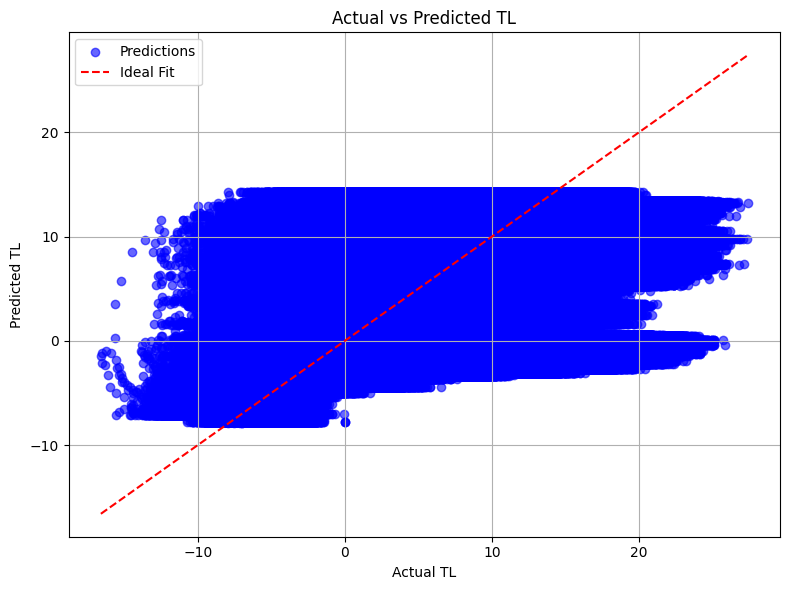

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load CSV
file_path = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/SARIMA/output_sarima.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Extract Actual and Predicted
y_true = df['Actual_TL']
y_pred = df['Predicted_TL']

# Calculate metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual TL')
plt.ylabel('Predicted TL')
plt.title('Actual vs Predicted TL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
